# Ichimoku Kinko Hyo (AKA Ichimoku Cloud)

https://www.investopedia.com/terms/i/ichimokuchart.asp

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2016-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,99.499107,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,97.005730,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,95.107361,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,91.093399,81094400
2016-01-08,98.550003,99.110001,96.760002,96.959999,91.575073,70798000


Tenkan-sen - The tenkan-sen, or conversion line, is calculated by adding the highest high and the highest low over the past nine periods and then dividing the result by two. The resulting line represents a key support and resistance level, as well as a signal line for reversals.

In [3]:
# First Create Tenkan_Sen
high_9 = df['High'].rolling(9).max()
low_9 = df['Low'].rolling(9).min()
df['Tenkan_Sen'] = (high_9 + low_9) /2

Kijun-sen - The kijun-sen, or base line, is calculated by adding the highest high and the lowest low over the past 26 periods and dividing the result by two. The resulting line represents a key support and resistance level, a confirmation of a trend change, and can be used as a trailing stop-loss point.

In [4]:
# Second Create Kijun Sen
high_26 = df['High'].rolling(26).max()
low_26 = df['Low'].rolling(26).min()
df['Kijun_Sen'] = (high_26 + low_26) /2


Senkou Span A - The senkou span A, or leading span A, is calculated by adding the tenkan-sen and the kijun-sen, dividing the result by two, and then plotting the result 26 periods ahead. The resulting line forms one edge of the kumo - or cloud - that's used to identify future areas of support and resistance.


In [5]:
# Third Create Senkou Span A 
df['Senkou_Span_A'] = ((df['Tenkan_Sen'] + df['Kijun_Sen']) / 2).shift(26)

Senkou Span B - The senkou span B, or leading span B, is calculated by adding the highest high and the lowest low over the past 52 periods, dividing it by two, and then plotting the result 26 periods ahead. The resulting line forms the other edge of the kumo that's used to identify future areas of support and resistance.

In [6]:
# Fourth Create Senkou Span B 
high_52 = df['High'].rolling(52).max()
low_52 = df['Low'].rolling(52).min()
df['Senkou_Span_B'] = ((high_52 + low_52) /2).shift(26)

Chikou Span - The chikou span, or lagging span, is the current period's closing price plotted 26 days back on the chart. This line is used to show possible areas of support and resistance.

In [7]:
df['Chikou_Span'] = df['Adj Close'].shift(-26)

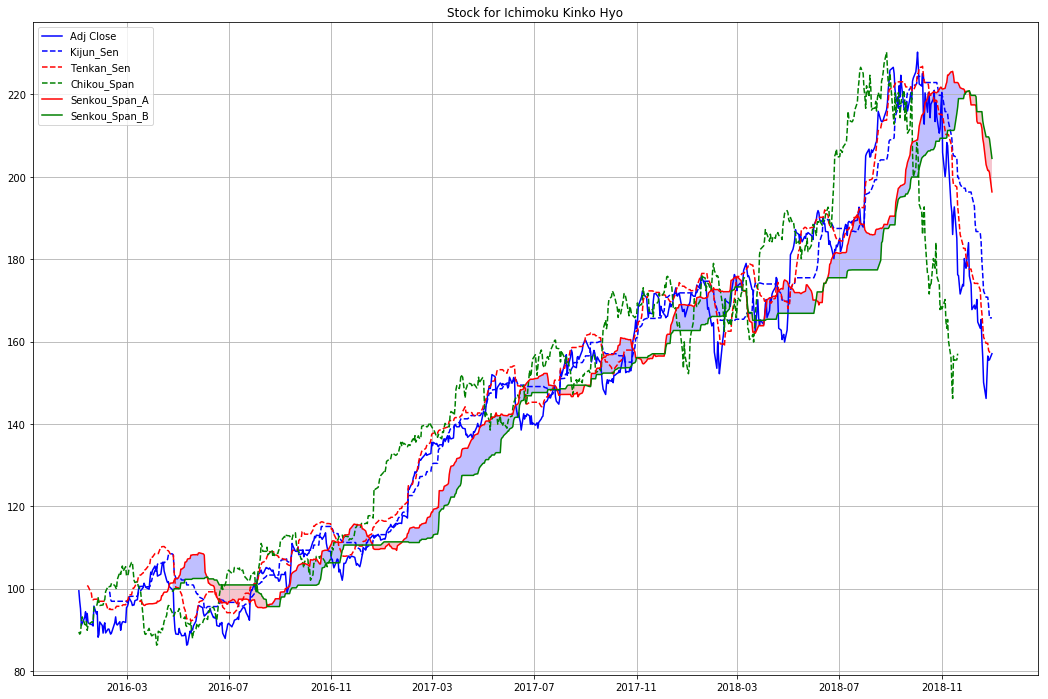

In [8]:
plt.figure(figsize=(18,12))
plt.plot(df['Adj Close'], '-b')
plt.plot(df['Kijun_Sen'],  'b--')
plt.plot(df['Tenkan_Sen'],  'r--')
plt.plot(df['Chikou_Span'], 'g--')
plt.plot(df['Senkou_Span_A'], 'r')
plt.plot(df['Senkou_Span_B'], 'g')
plt.fill_between(df.index, df['Senkou_Span_A'], df['Senkou_Span_B'], where=df['Senkou_Span_A']> df['Senkou_Span_B'], facecolor='blue', interpolate=True, alpha=0.25)
plt.fill_between(df.index, df['Senkou_Span_A'], df['Senkou_Span_B'], where=df['Senkou_Span_B']> df['Senkou_Span_A'], facecolor='crimson', interpolate=True, alpha=0.25)
plt.grid()
plt.legend(loc='best')
plt.title('Stock for Ichimoku Kinko Hyo')
plt.show()

In [9]:
df2 = df.reset_index()
df2 = df2.apply(pd.to_numeric, errors='ignore')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tenkan_Sen,Kijun_Sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
0,1451865600000000000,102.610001,105.370003,102.000000,105.349998,99.499107,67649400,NaN,NaN,NaN,NaN,89.517586
1,1451952000000000000,105.750000,105.849998,102.410004,102.709999,97.005730,55791000,NaN,NaN,NaN,NaN,88.976318
2,1452038400000000000,100.559998,102.370003,99.870003,100.699997,95.107361,68457400,NaN,NaN,NaN,NaN,89.251686
3,1452124800000000000,98.680000,100.129997,96.430000,96.449997,91.093399,81094400,NaN,NaN,NaN,NaN,91.768089
4,1452211200000000000,98.550003,99.110001,96.760002,96.959999,91.575073,70798000,NaN,NaN,NaN,NaN,93.173508


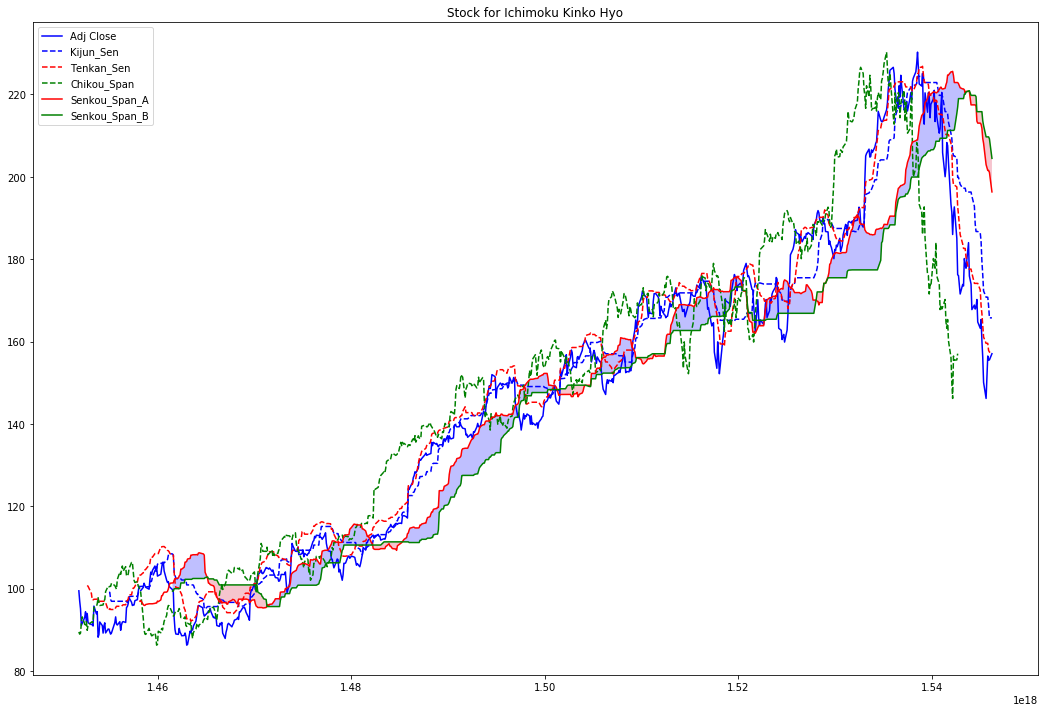

In [10]:
# This one does not show dates
plt.figure(figsize=(18,12))
plt.plot(df2['Date'], df2['Adj Close'], '-b')
plt.plot(df2['Date'], df2['Kijun_Sen'],  'b--')
plt.plot(df2['Date'], df2['Tenkan_Sen'],  'r--')
plt.plot(df2['Date'], df2['Chikou_Span'], 'g--')
plt.plot(df2['Date'], df2['Senkou_Span_A'], 'r')
plt.plot(df2['Date'], df2['Senkou_Span_B'], 'g')
plt.fill_between(df2['Date'], df2['Senkou_Span_A'], df2['Senkou_Span_B'], where=df2['Senkou_Span_A']> df2['Senkou_Span_B'], facecolor='blue', interpolate=True, alpha=0.25)
plt.fill_between(df2['Date'], df2['Senkou_Span_A'], df2['Senkou_Span_B'], where=df2['Senkou_Span_B']> df2['Senkou_Span_A'], facecolor='crimson', interpolate=True, alpha=0.25)
plt.legend(loc='best')
plt.title('Stock for Ichimoku Kinko Hyo')
plt.show()